IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [2]:
data = pd.read_excel("Dataset to B.tech.xlsx")
data

,Id,Judgment,Lawyers Summary,Golden summary,Domain,Judgment Status,Equivalent Citation,Name,Court name,Label,Link
0,1,"""1. Being aggrieved by the judgment delivered ...","""The appeal was filed by a co-operative socie...","""The appellant, a cooperative society, filed a...",Civil,Appeal dismissed,CIVIL APPEAL NO. 3880 OF 2003,Rajasthan R.S.S. & Ginning Mills Fed.Ltd Vs. D...,Supreme Court,0,NaN
1,2,"""This was an appeal from a judgment and decree...","A complaint has been lodged against you, unde...","""The appellants were members of the East India...",Civil,Appeal dismissed,"1950 AIR, 7 1950 SCR 64",Messrs. Khimji Poonja And Company vs Shri Bald...,Supreme Court,0,NaN
2,3,"""This was an application under article 32 (1) ...",Appeal comes under article 374 (4) of the Con...,"""Petitioner Rashid Ahmed is running a wholesal...",Civil,Petition allowed,"1950 AIR 163, 1950 SCR 566","Rashid Ahmed vs The Municipal Board, Kairana.T...",Supreme Court,0,NaN
3,4,"""APPEAL from a judgment of the High Court of H...",The appeal was presented to the Judicial Commi...,"""The decree-holder made an application in revi...",Civil,Appeal allowed,"1953 AIR 413, 1950 SCR 747",Supreme Court Of India ... vs Kadar Unnisa Beg...,Supreme Court,0,NaN
4,5,"""APPEAL under article 374(4) of the Constituti...",The appeal was presented to the Judicial Commi...,"""An application was made for the execution of...",Civil,Appeal allowed,"1950 AIR 274, 1950 SCR 741",Supreme Court Of India ... vs Nandlal on 12 O...,Supreme Court,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
895,896,documents in column 3 thereof. The petitioner ...,,,Writ,NaN,NaN,NaN,Calcutta High Court,2,NaN
896,897,for such unauthorised construction before the ...,,,Civil,NaN,NaN,NaN,Calcutta High Court,0,NaN
897,898,"Mr. Jayanta Kr. Mitra, Sr. Advocate with Mr. R...",,,Writ,NaN,NaN,NaN,Calcutta High Court,2,NaN
898,899,Considering the averments contained in the app...,,,Revision Petition,NaN,NaN,NaN,Calcutta High Court,5,NaN


In [3]:
data.shape

(900, 11)

A1

In [4]:
class1_data = data[data['Label'] == 'Judgment']
class2_data = data[data['Label'] == 'Lawyers Summary']

# Extract features and labels from your DataFrame
numeric_columns = data.select_dtypes(include=[np.number])  # Select only numeric columns
features = numeric_columns.to_numpy()
labels = data['Label'].to_numpy()

# Calculate class centroids (means)
unique_labels = np.unique(labels)
n_labels = len(unique_labels)

# Create an empty array to hold the mean vector for each label
class_centroids = np.empty((n_labels, features.shape[-1]))
class_spreads = np.empty((n_labels, features.shape[-1]))

for i in range(n_labels):
    idxs = labels == unique_labels[i]
    class_centroids[i] = np.mean(features[idxs], axis=0)
    class_spreads[i] = np.std(features[idxs], axis=0)

# Calculate the distance between mean vectors (interclass distance)
interclass_distance = np.linalg.norm(class_centroids[0] - class_centroids[1])

print("Class 1 Centroid:\n", class_centroids[0])
print("Class 2 Centroid:\n", class_centroids[1])
print("Class 1 Spread:\n", class_spreads[0])
print("Class 2 Spread:\n", class_spreads[1])
print("Interclass Distance:", interclass_distance)

Class 1 Centroid:
 [413.54269972   0.                  nan]
Class 2 Centroid:
 [402.2601626   1.                nan]
Class 1 Spread:
 [289.52646857   0.                  nan]
Class 2 Spread:
 [251.40292013   0.                  nan]
Interclass Distance: nan


A2

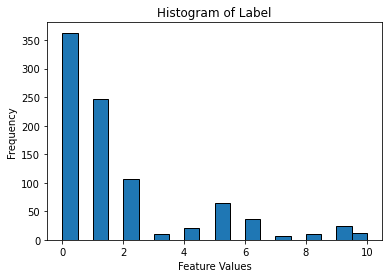

Mean: 1.751111111111111
Variance: 5.975805215671734


In [5]:
feature_name = 'Label'

# Extract the feature data
feature_data = data[feature_name]

# Filter out non-numeric values (assuming they are strings)
feature_data = feature_data.apply(pd.to_numeric, errors='coerce')
feature_data = feature_data.dropna()

# histogram
plt.hist(feature_data, bins=20, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel("Feature Values")
plt.ylabel("Frequency")
plt.title(f"Histogram of {feature_name}")
plt.show()

mean_value = feature_data.mean()
variance_value = feature_data.var()

print("Mean:", mean_value)
print("Variance:", variance_value)

A3

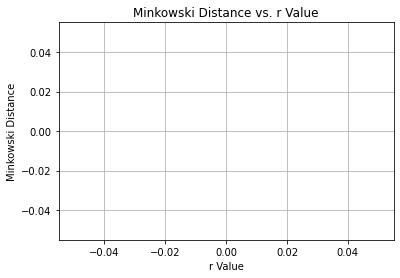

In [6]:
feature1 = features[0]
feature2 = features[1]

# Define a range of r values
r_values = range(1, 11)

# Calculate Minkowski distances for each r
minkowski_distances = []

for r in r_values:
    dist = np.linalg.norm(feature1 - feature2, ord=r)
    minkowski_distances.append(dist)

# Plot the distances
plt.plot(r_values, minkowski_distances, marker='o')
plt.xlabel("r Value")
plt.ylabel("Minkowski Distance")
plt.title("Minkowski Distance vs. r Value")
plt.grid(True)
plt.show()

A4

In [7]:
#we need to perform text preprocessing and convert the text into numerical representations
X_text = data[['Judgment', 'Lawyers Summary']]
y = data['Label']

#combining text columns into single text column for tfidf processing
X_text['Combined_Text'] = X_text['Judgment'].fillna('') + ' ' + X_text['Lawyers Summary'].fillna('')
#tfidf vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=900)
X_tfidf= tfidf_vectorizer.fit_transform(X_text['Combined_Text'])

C:\Users\anany\AppData\Local\Temp\ipykernel_11632\1405947459.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_text['Combined_Text'] = X_text['Judgment'].fillna('') + ' ' + X_text['Lawyers Summary'].fillna('')


In [8]:
#now we have numerical features
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3)

A5

In [9]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

A6

In [10]:
#accuracy of kNN

accuracy = neigh.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5666666666666667


A7

In [11]:
predicted_classes = neigh.predict(X_test)

predicted_classes

array([0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 4, 1, 1, 0,
       0, 0, 2, 1, 9, 0, 1, 1, 1, 0, 1, 1, 1, 1, 6, 0, 2, 9, 1, 0, 5, 6,
       1, 0, 1, 0, 1, 8, 0, 6, 0, 1, 9, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 5, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 9, 0, 9,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 9, 4, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 9, 1, 2, 9, 0, 1, 1, 6, 0, 9, 0, 0, 0, 0, 1, 0, 1, 4, 2,
       0, 2, 1, 6, 0, 0, 0, 0, 0, 0, 0, 9, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 5, 1, 1, 1, 0, 0, 0, 0, 1, 0, 9, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 9, 0, 3, 1, 0, 1, 1, 0, 0, 0, 0, 6, 2, 0, 1, 2, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0], dtype=int64)

A8

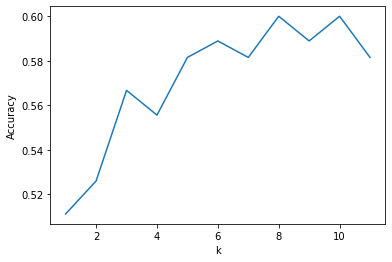

In [12]:
accuracies = []

for k in range(1, 12):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    accuracy = neigh.score(X_test, y_test)
    accuracies.append(accuracy)

plt.plot(range(1, 12), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

A9

In [13]:
# Assuming 'neigh' is your kNN classifier
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

# Confusion Matrix for Training Data
confusion_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):")
print(confusion_train)

# Confusion Matrix for Test Data
confusion_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Data):")
print(confusion_test)

# Performance Metrics for Training Data
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')
print("\nPerformance Metrics (Training Data):")
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

# Performance Metrics for Test Data
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print("\nPerformance Metrics (Test Data):")
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Confusion Matrix (Training Data):
[[228  24   4   0   0   1   4   0   0   1   0]
 [ 31 127   1   0   0   0   0   0   0   1   0]
 [ 50   5  16   0   0   1   1   0   0   1   0]
 [  6   4   0   0   0   0   0   0   0   0   0]
 [ 11   0   0   0   0   1   0   0   0   0   0]
 [ 23  14   2   0   0   8   0   0   0   0   1]
 [  7   0   0   0   0   0  22   0   0   0   0]
 [  2   4   1   0   0   0   0   0   0   0   0]
 [  5   1   0   0   0   0   0   0   0   0   0]
 [  9   3   0   0   0   0   1   0   0   3   0]
 [  6   0   0   0   0   0   0   0   0   0   0]]

Confusion Matrix (Test Data):
[[81 13  3  0  0  2  0  2  0]
 [16 68  0  0  1  0  0  1  0]
 [25  3  2  0  0  1  0  2  0]
 [ 8  0  0  0  0  0  0  0  0]
 [10  5  1  0  1  0  0  0  0]
 [ 4  0  0  0  0  3  0  0  0]
 [ 3  1  0  0  0  0  0  0  0]
 [ 4  2  0  0  0  0  0  2  0]
 [ 5  0  0  0  1  0  0  0  0]]

Performance Metrics (Training Data):
Precision: 0.6106479939813273
Recall: 0.6412698412698413
F1-Score: 0.5864051191925509

Performance Metrics (

C:\Users\anany\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anany\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
